In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model
import random


In [0]:
np.random.seed(0)

In [0]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
 

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(10000, 28, 28)


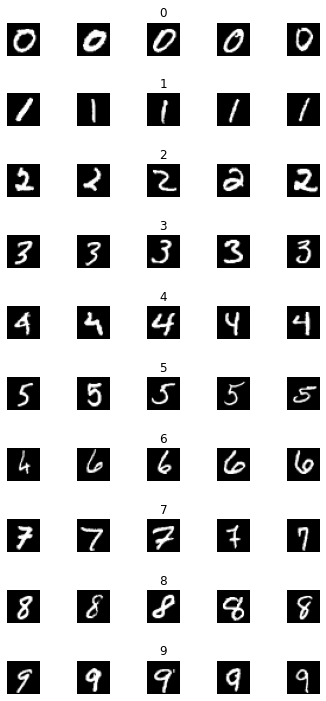

In [0]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


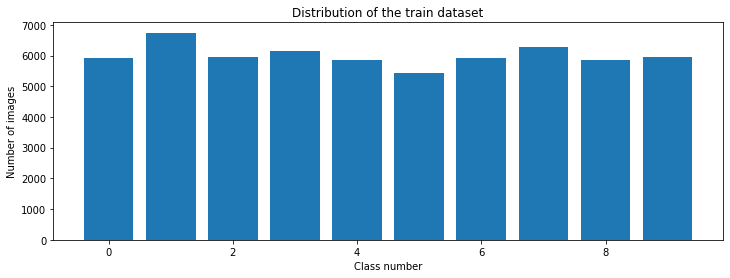

In [0]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [0]:
def leNet_model():
  model  = Sequential()
  model.add(Conv2D(filters=30,kernel_size=(5,5), input_shape=(28,28,1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(filters=15, kernel_size=(3,3), activation= 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(0.01),loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [2]:
model = leNet_model()

NameError: ignored

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)              

In [0]:
h = model.fit(X_train,y_train,epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 54000 samples, validate on 6000 samples
Epoch 1/10





54000/54000 [==============================] - 14s 253us/step - loss: 0.2478 - acc: 0.9194 - val_loss: 0.0509 - val_acc: 0.9842
Epoch 2/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0706 - acc: 0.9791 - val_loss: 0.0365 - val_acc: 0.9888
Epoch 3/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0586 - acc: 0.9816 - val_loss: 0.0538 - val_acc: 0.9843
Epoch 4/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0533 - acc: 0.9836 - val_loss: 0.0350 - val_acc: 0.9900
Epoch 5/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0437 - acc: 0.9866 - val_loss: 0.0350 - val_acc: 0.9897
Epoch 6/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0423 - acc: 0.9869 - val_loss: 0.0379 - val_acc: 0.9887
Epoch 7/10
54000/54000 [=

Text(0.5, 0, 'epochs')

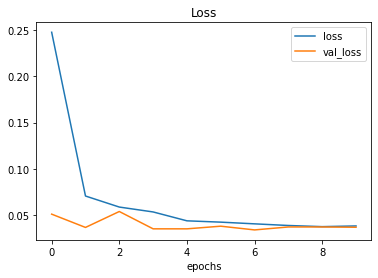

In [0]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

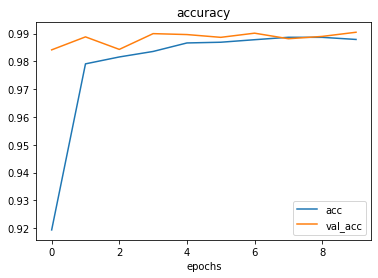

In [0]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('accuracy')
plt.xlabel('epochs')

In [0]:
score = model.evaluate(X_test,y_test, verbose=0)
print("test score",score[0])
print("test accuracy",score[1])

test score 0.03746441486095273
test accuracy 0.9883


(850, 850, 4)


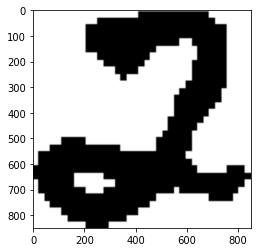

In [0]:
import requests
from PIL import Image
import cv2
url1 = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
#url2 = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
response = requests.get(url1,stream='True')
img = Image.open(response.raw)
img_array = np.asarray(img)
print(img_array.shape)
plt.imshow(img)
resized = cv2.resize(img_array,(28,28))
grayscale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
final_image = cv2.bitwise_not(grayscale)
final_norm_image = final_image/255
image1 = final_norm_image.reshape(1,28,28,1)

In [0]:
prediction = model.predict_classes(image1)
prediction

array([2])

In [0]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
visual_layer_1 = layer1.predict(image1)
visual_layer_2 = layer2.predict(image1)
print(visual_layer_1.shape)
print(visual_layer_2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


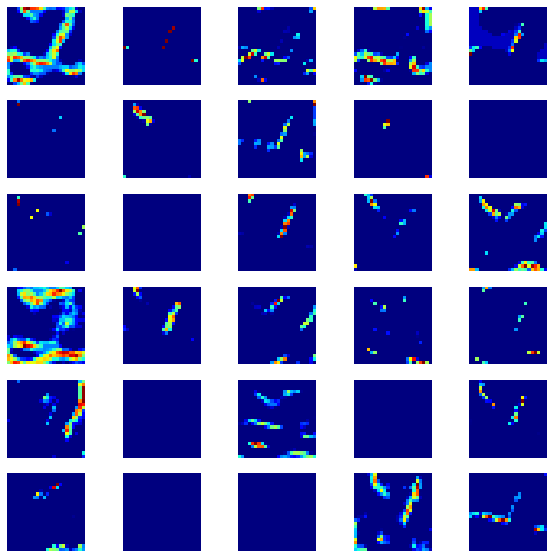

In [0]:
plt.figure(figsize=(10,10))
for i in range(30):
  plt.subplot(6,5,i+1)
  plt.imshow(visual_layer_1[0, :, :, i], cmap= plt.get_cmap('jet'))
  plt.axis('off')

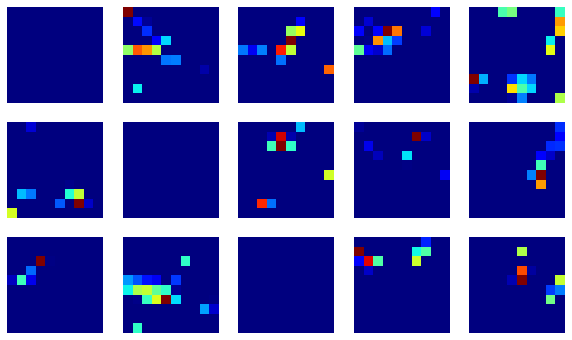

In [0]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(visual_layer_2[0, :, :, i], cmap= plt.get_cmap('jet'))
  plt.axis('off')